In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from keras.src.callbacks import EarlyStopping
import random
import numpy as np
import tensorflow as tf
from keras.api.layers import Dense, Dropout
from keras.api.models import Sequential
from keras.api.regularizers import l1, l2
from keras.api.optimizers import Adam

In [92]:
symbol = "EURUSD=X"
start = "2004-01-01"
end = "2024-08-22"
interval = '1d'

In [93]:
df = yf.download(symbol, start, end, interval=interval)
#df.rename(columns={"Close": "price"}, inplace=True)
df.drop(columns=['Adj Close', 'Volume'], inplace=True)
#df.index = df.index.tz_convert('utc')
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))
df['day_of_week'] = df.index.dayofweek
df['dir'] = np.where(df['returns'] > 0, 1,0)
df.dropna(inplace=True)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,returns,day_of_week,dir
Date,,,,,,,
2004-01-02,1.258194,1.262802,1.252693,1.258194,0.000000,4,0
2004-01-05,1.263903,1.269406,1.263695,1.268698,0.008313,0,1
2004-01-06,1.268907,1.280803,1.267202,1.272103,0.002681,1,1
2004-01-07,1.272394,1.273999,1.262499,1.264095,-0.006315,2,0
2004-01-08,1.264095,1.278707,1.256502,1.277498,0.010547,3,1
...,...,...,...,...,...,...,...
2024-08-15,1.101322,1.101686,1.095050,1.101322,0.001475,3,1
2024-08-16,1.097273,1.100437,1.097370,1.097273,-0.003683,4,0
2024-08-19,1.102499,1.107260,1.102390,1.102499,0.004752,0,1


In [94]:
tnx_symbol = "^TNX"

tnx = yf.download(tnx_symbol, start, end, interval=interval)
#df.rename(columns={"Close": "price"}, inplace=True)
tnx.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
#df.index = df.index.tz_convert('utc')
tnx.rename(columns={'Close': 'tnx_close', 'Volume': 'tnx_volume'}, inplace=True)
tnx['tnx_returns'] = np.log(tnx['tnx_close'].div(tnx['tnx_close'].shift(1)))
#tnx['tnx_simple_returns'] = tnx['tnx_close'] - tnx['tnx_close'].shift(1)
tnx.dropna(inplace=True)
forex_combined = tnx.join(df, how='outer')
tnx

[*********************100%%**********************]  1 of 1 completed


,tnx_close,tnx_volume,tnx_returns
Date,,,
2004-01-05,4.387,0,0.003196
2004-01-06,4.277,0,-0.025394
2004-01-07,4.246,0,-0.007274
2004-01-08,4.249,0,0.000706
2004-01-09,4.086,0,-0.039117
...,...,...,...
2024-08-15,3.926,0,0.027371
2024-08-16,3.892,0,-0.008698
2024-08-19,3.867,0,-0.006444


In [95]:
snp_symbol = "^SPX"

snp = yf.download(snp_symbol, start, end, interval=interval)
#df.rename(columns={"Close": "price"}, inplace=True)
snp.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
#df.index = df.index.tz_convert('utc')
snp.rename(columns={'Close': 'snp_close', 'Volume': 'snp_volume'}, inplace=True)
snp['snp_returns'] = np.log(snp['snp_close'].div(snp['snp_close'].shift(1)))
snp.dropna(inplace=True)
forex_combined = snp.join(forex_combined, how='outer')

[*********************100%%**********************]  1 of 1 completed


In [96]:
gold_symbol = "GC=F"

gold = yf.download(gold_symbol, start, end, interval=interval)
#df.rename(columns={"Close": "price"}, inplace=True)
gold.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
#df.index = df.index.tz_convert('utc')
gold.rename(columns={'Close': 'gold_close', 'Volume': 'gold_volume'}, inplace=True)
gold['gold_returns'] = np.log(gold['gold_close'].div(gold['gold_close'].shift(1)))
gold.dropna(inplace=True)
forex_combined = gold.join(forex_combined, how='outer')

[*********************100%%**********************]  1 of 1 completed


In [97]:
oil_symbol = "CL=F"

oil = yf.download(oil_symbol, start, end, interval=interval)
#df.rename(columns={"Close": "price"}, inplace=True)
oil.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace=True)
oil.rename(columns={'Close': 'oil_close', 'Volume': 'oil_volume'}, inplace=True)
oil['oil_returns'] = np.log(oil['oil_close'].div(oil['oil_close'].shift(1)))
oil.dropna(inplace=True)
forex_combined = oil.join(forex_combined, how='outer')

[*********************100%%**********************]  1 of 1 completed
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [98]:
forex_combined

,oil_close,oil_volume,oil_returns,gold_close,gold_volume,gold_returns,snp_close,snp_volume,snp_returns,tnx_close,tnx_volume,tnx_returns,Open,High,Low,Close,returns,day_of_week,dir
Date,,,,,,,,,,,,,,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.258194,1.262802,1.252693,1.258194,0.000000,4.0,0.0
2004-01-05,NaN,NaN,NaN,NaN,NaN,NaN,1122.219971,1.578200e+09,0.012319,4.387,0.0,0.003196,1.263903,1.269406,1.263695,1.268698,0.008313,0.0,1.0
2004-01-06,33.700001,103405.0,-0.002371,422.799988,20.0,-0.003777,1123.670044,1.494500e+09,0.001291,4.277,0.0,-0.025394,1.268907,1.280803,1.267202,1.272103,0.002681,1.0,1.0
2004-01-07,33.619999,81675.0,-0.002377,421.899994,20.0,-0.002131,1126.329956,1.704900e+09,0.002364,4.246,0.0,-0.007274,1.272394,1.273999,1.262499,1.264095,-0.006315,2.0,0.0
2004-01-08,33.980000,92709.0,0.010651,424.000000,20.0,0.004965,1131.920044,1.868400e+09,0.004951,4.249,0.0,0.000706,1.264095,1.278707,1.256502,1.277498,0.010547,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-15,78.160004,195122.0,0.015212,2453.100098,285.0,0.005601,5543.220215,3.723310e+09,0.016004,3.926,0.0,0.027371,1.101322,1.101686,1.095050,1.101322,0.001475,3.0,1.0
2024-08-16,76.650002,100810.0,-0.019508,2498.600098,197.0,0.018378,5554.250000,3.357690e+09,0.001988,3.892,0.0,-0.008698,1.097273,1.100437,1.097370,1.097273,-0.003683,4.0,0.0
2024-08-19,74.370003,118172.0,-0.030197,2501.800049,88.0,0.001280,5608.250000,3.222050e+09,0.009675,3.867,0.0,-0.006444,1.102499,1.107260,1.102390,1.102499,0.004752,0.0,1.0


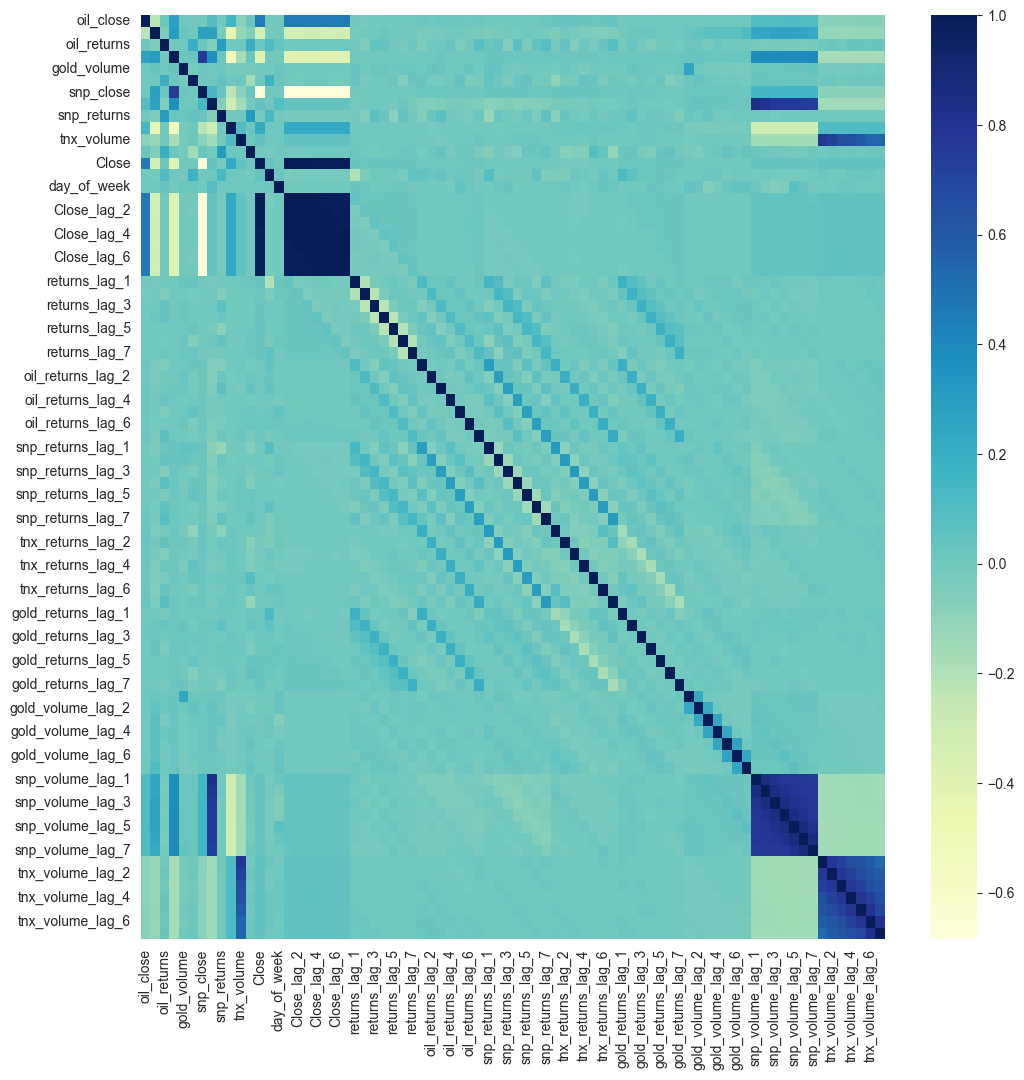

In [99]:
import seaborn as sns
%matplotlib inline

forex_clean = forex_combined.copy()
forex_clean.drop(columns=[ 'dir', 'Open', 'High', 'Low'], inplace=True)

features = ['Close', 'returns', 'oil_returns', 'snp_returns', 'tnx_returns', 'gold_returns', 'gold_volume', 'snp_volume', 'tnx_volume']
cols = []
for f in features:
    for lag in range(1, 7 + 1):
        col = "{}_lag_{}".format(f, lag)
        forex_clean[col] = forex_clean[f].shift(lag)
        cols.append(col)
forex_clean.dropna(inplace=True)

#dataplot = sns.heatmap(forex_clean.corr(), cmap="YlGnBu", annot=True) 

plt.figure(figsize = (12,12))
sns.heatmap(forex_clean.corr(), cmap="YlGnBu")
plt.show ()

In [100]:
forex_clean.corr().iloc[13]

oil_close          -0.001211
oil_volume         -0.014772
oil_returns         0.106258
gold_close          0.001385
gold_volume        -0.009104
                      ...   
tnx_volume_lag_3   -0.003224
tnx_volume_lag_4    0.007154
tnx_volume_lag_5    0.017154
tnx_volume_lag_6    0.007016
tnx_volume_lag_7    0.003016
Name: returns, Length: 78, dtype: float64

In [101]:
forex_clean.loc['2024'].corr().iloc[13]

oil_close          -0.156544
oil_volume         -0.003701
oil_returns        -0.049726
gold_close          0.076054
gold_volume         0.037634
                      ...   
tnx_volume_lag_3         NaN
tnx_volume_lag_4         NaN
tnx_volume_lag_5         NaN
tnx_volume_lag_6         NaN
tnx_volume_lag_7         NaN
Name: returns, Length: 78, dtype: float64

<Axes: >

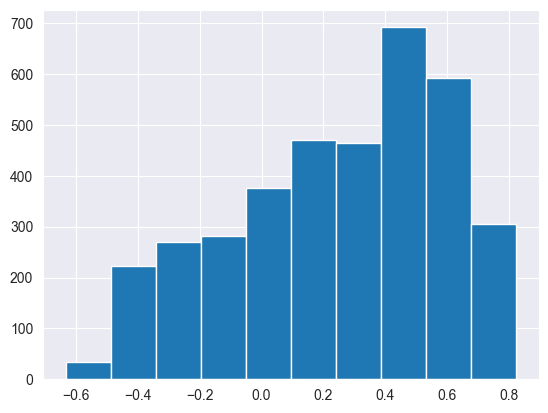

In [102]:
corr_df = forex_clean.ffill()
rolling_corr = corr_df['snp_returns'].rolling(window=30).corr(corr_df['tnx_returns'])
rolling_corr.dropna()

(rolling_corr.hist())

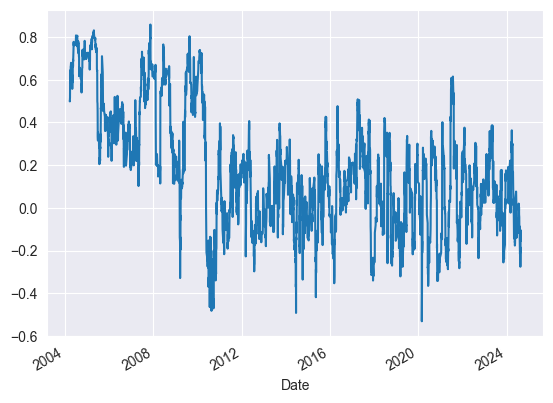

In [103]:
corr_gold_df = forex_clean.ffill()
rolling_corr_gold = corr_gold_df['gold_returns'].rolling(window=30).corr(corr_gold_df['returns'])
rolling_corr_gold.dropna()

rolling_corr_gold.plot()
plt.show()

In [104]:
forex_clean.to_csv('daily_forex.csv')